In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn

from matplotlib.pyplot import pie, axis, show
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import svm
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error

In [2]:
df = pd.read_csv("Telco-Customer-Churn V1.01.csv")


In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print(df.shape)

(7043, 20)


In [6]:
pd.Series({c: df[c].unique() for c in df})

gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies                        [No, Yes, No internet service]
Contract            

In [7]:
## changing the spacebar in totalcharges to 0 
df.loc[df["TotalCharges"]==" ", "TotalCharges"] = 0
df = df.astype({'TotalCharges': 'float64'},errors ="raise")

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

<AxesSubplot:>

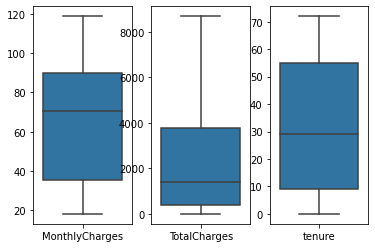

In [9]:
df1 = df[["MonthlyCharges"]]
df2 = df[["TotalCharges"]]
df3 = df[["tenure"]]

plt.subplot(1, 3, 1)
sns.boxplot(data=df1)

plt.subplot(1, 3, 2)
sns.boxplot(data=df2)

plt.subplot(1, 3, 3)
sns.boxplot(data=df3)

# Preprocessing

In [10]:
## changing the spacebar in totalcharges to 0 
df.loc[df["TotalCharges"]==" ", "TotalCharges"] = 0
df = df.astype({'TotalCharges': 'float64'},errors ="raise")

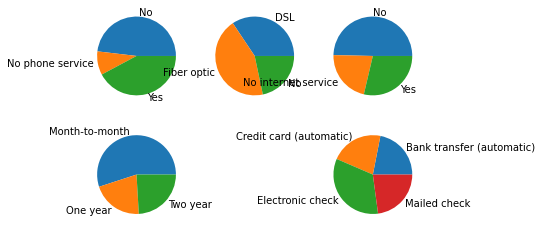

In [11]:
count = df.gender.groupby(df.MultipleLines).count()
plt.subplot(2,3,1)
pie(count, labels=count.index);

count = df.gender.groupby(df.InternetService).count()
plt.subplot(2,3,2)
pie(count, labels=count.index);

count = df.gender.groupby(df.OnlineSecurity).count()
plt.subplot(2,3,3)
pie(count, labels=count.index);

count = df.gender.groupby(df.Contract).count()
plt.subplot(2,3,4)
pie(count, labels=count.index);

count = df.gender.groupby(df.PaymentMethod).count()
plt.subplot(2,3,6)
pie(count, labels=count.index);

In [12]:
le = LabelEncoder()
en_df = df[["gender","SeniorCitizen",'Partner','Dependents','PhoneService','MultipleLines','InternetService'
          ,'OnlineSecurity',"OnlineBackup",'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
          'PaymentMethod',"Churn"]].apply(le.fit_transform)
en_df[['tenure','MonthlyCharges','TotalCharges']] = df[['tenure','MonthlyCharges','TotalCharges']]
en_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.50
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,2,53.85,108.15
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,24,84.80,1990.50
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,72,103.20,7362.90
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,11,29.60,346.45
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,4,74.40,306.60


In [13]:
en_df['scaled_tenure'] = StandardScaler().fit_transform(en_df['tenure'].values.reshape(-1,1))
en_df['scaled_MonthlyCharges'] = StandardScaler().fit_transform(en_df['MonthlyCharges'].values.reshape(-1,1))
en_df['scaled_TotalCharges'] = StandardScaler().fit_transform(en_df['TotalCharges'].values.reshape(-1,1))


en_df = en_df.drop(['tenure','TotalCharges'], axis = 1)
en_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,scaled_tenure,scaled_MonthlyCharges,scaled_TotalCharges
0,0,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,0,29.85,-1.277445,-1.160323,-0.992611
1,1,0,0,0,1,0,0,2,0,2,...,0,0,1,0,3,0,56.95,0.066327,-0.259629,-0.172165
2,1,0,0,0,1,0,0,2,2,0,...,0,0,0,1,3,1,53.85,-1.236724,-0.362660,-0.958066
3,1,0,0,0,0,1,0,2,0,2,...,0,0,1,0,0,0,42.30,0.514251,-0.746535,-0.193672
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,1,70.70,-1.236724,0.197365,-0.938874


# Model for customer churn 

In [14]:
features=["gender","SeniorCitizen",'Partner','Dependents','scaled_tenure','PhoneService','MultipleLines','InternetService'
          ,'OnlineSecurity',"OnlineBackup",'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
          'PaymentMethod','scaled_MonthlyCharges','scaled_TotalCharges']

In [15]:
X , y = en_df[features],en_df["Churn"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [16]:
def plot_cm(cm,title):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(cm, cmap=plt.cm.Greens, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(title, fontsize=22)
    plt.show()

In [17]:
def run_models_classification(x_train,y_train,x_test,y_test):
    models= [['Logistic Regression ',LogisticRegression()],
            ['KNearest Neighbor ',KNeighborsClassifier()],
            ['Decision Tree Classifier ',DecisionTreeClassifier()],
            ['Random Forest Classifier ',RandomForestClassifier()],
            ['SVM ',SVC()]]

    models_score = []
    for name,model in models:

        model = model
        model.fit(x_train,y_train)
        model_pred = model.predict(x_test)
        cm_model = confusion_matrix(y_test, model_pred)
        print(cm_model)
        models_score.append(accuracy_score(y_test,model.predict(x_test)))

        print(name)
        print('Validation Acuuracy: ',accuracy_score(y_test,model.predict(x_test)))
        print('Training Accuracy: ',accuracy_score(y_train,model.predict(x_train)))
       
        plot_cm(cm_model,title=name+"model")

        
        
    return models_score

[[933 107]
 [170 199]]
Logistic Regression 
Validation Acuuracy:  0.8034066713981547
Training Accuracy:  0.8049343272985445


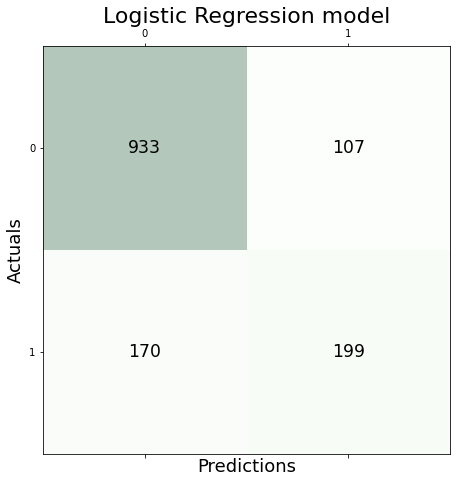

[[892 148]
 [196 173]]
KNearest Neighbor 
Validation Acuuracy:  0.7558552164655784
Training Accuracy:  0.8329783457578984


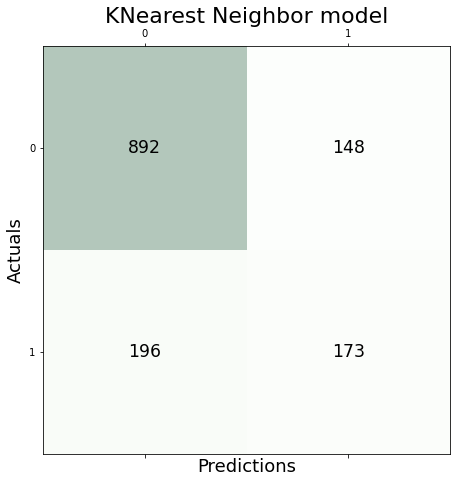

[[847 193]
 [185 184]]
Decision Tree Classifier 
Validation Acuuracy:  0.7317246273953159
Training Accuracy:  0.9982250621228257


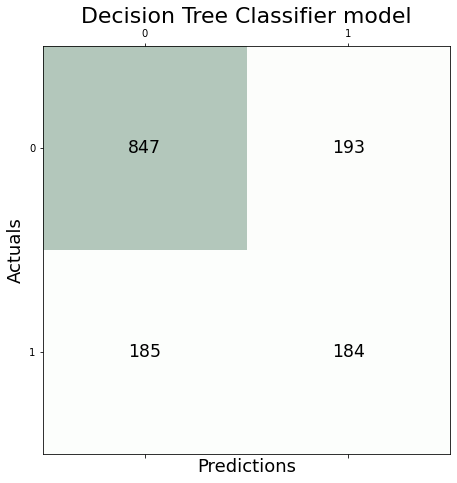

[[932 108]
 [187 182]]
Random Forest Classifier 
Validation Acuuracy:  0.7906316536550745
Training Accuracy:  0.9982250621228257


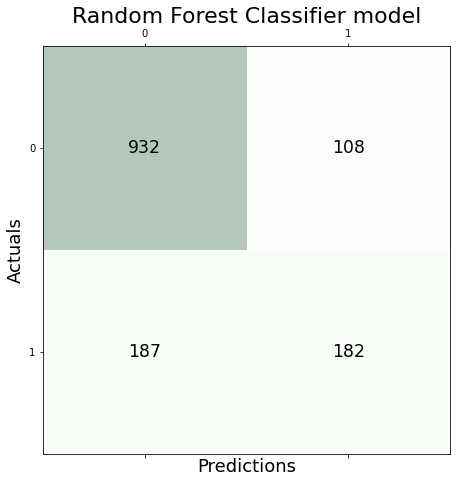

[[961  79]
 [195 174]]
SVM 
Validation Acuuracy:  0.8055358410220014
Training Accuracy:  0.8171813986510472


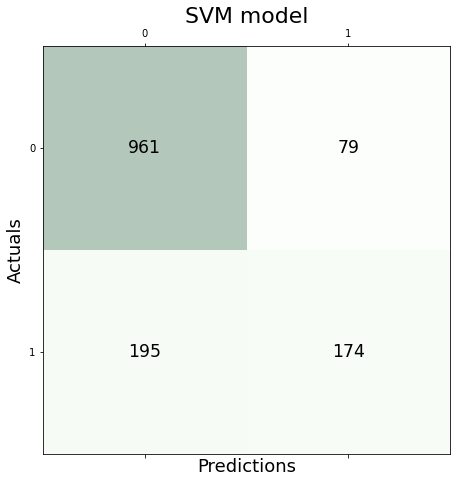

In [18]:
models_score = run_models_classification(x_train,y_train,x_test,y_test)

In [19]:
def hist_score(score):
    models_names = [
    'Logistic Regression',
    'KNearest Neighbor',
    'Decision Tree Classifier',
    'Random Forest Classifier',
    'SVM']

    plt.rcParams['figure.figsize']=20,8
    sns.set_style('darkgrid')
    ax = sns.barplot(x=models_names, y=score, palette = "inferno", saturation =2.0)
    plt.xlabel('Classifier Models', fontsize = 20 )
    plt.ylabel('% of Accuracy', fontsize = 20)
    plt.title('Accuracy of different Classifier Models on test set', fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 12)
    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()

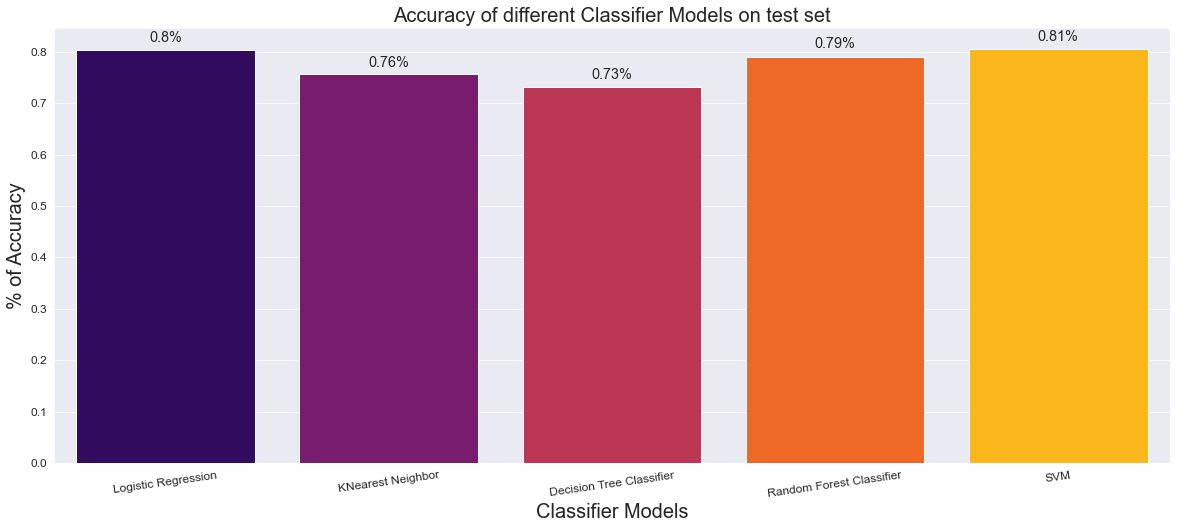

In [20]:
hist_score(models_score)

In [21]:
en_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,scaled_tenure,scaled_MonthlyCharges,scaled_TotalCharges
0,0,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,0,29.85,-1.277445,-1.160323,-0.992611
1,1,0,0,0,1,0,0,2,0,2,...,0,0,1,0,3,0,56.95,0.066327,-0.259629,-0.172165
2,1,0,0,0,1,0,0,2,2,0,...,0,0,0,1,3,1,53.85,-1.236724,-0.362660,-0.958066
3,1,0,0,0,0,1,0,2,0,2,...,0,0,1,0,0,0,42.30,0.514251,-0.746535,-0.193672
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,1,70.70,-1.236724,0.197365,-0.938874


# Model for monthly charges 

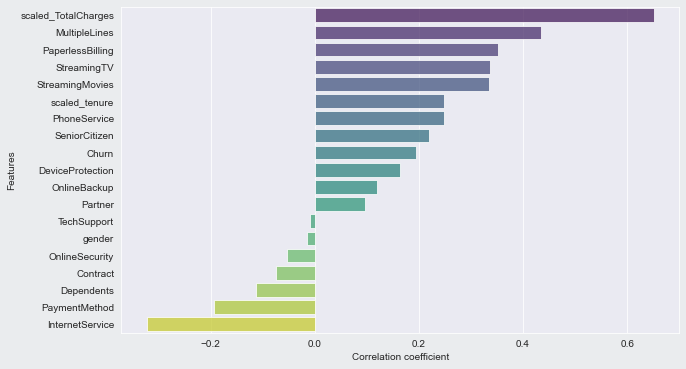

In [22]:
features=["gender","SeniorCitizen",'Partner','Dependents','scaled_tenure','PhoneService','MultipleLines','InternetService'
          ,'OnlineSecurity',"OnlineBackup",'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
          'PaymentMethod','Churn','scaled_TotalCharges']
from matplotlib.offsetbox import AnchoredText
correlation_table = []
for cols in features:
    y = en_df["MonthlyCharges"]
    x = en_df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict)

dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sns.barplot(x="Correlation coefficient", y="Features", 
                     data=dF1.sort_values("Correlation coefficient", ascending=False),
                     palette='viridis', alpha=0.75)
    


In [23]:
features=["SeniorCitizen",'Dependents','scaled_tenure','PhoneService','MultipleLines','InternetService'
          ,"OnlineBackup",'DeviceProtection','StreamingTV','StreamingMovies','PaperlessBilling',
          'PaymentMethod','Churn','scaled_TotalCharges']

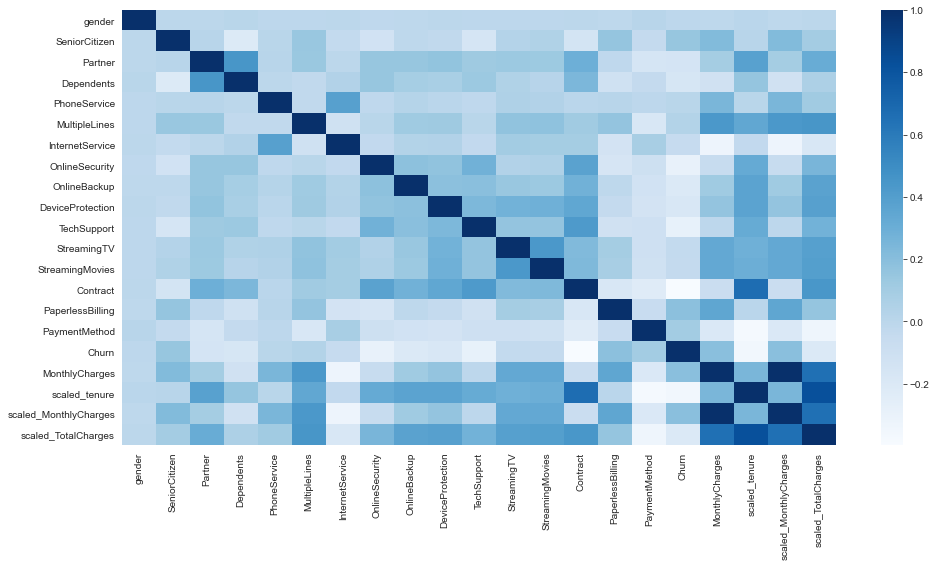

In [24]:
plt.figure(figsize=(16,8))
sns.heatmap(en_df.corr(),cmap="Blues");

In [25]:
X , y = en_df[features],en_df["MonthlyCharges"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [26]:
new_model = svm.SVR()

In [27]:
new_model.fit(x_train,y_train)

SVR()

In [28]:
new_model.predict(x_test)

array([101.43661504,  78.55733838,  59.54631343, ...,  79.8503485 ,
        75.49479467,  71.11287571])

In [29]:
print('Mean absolute error: ',mean_absolute_error(y_test, new_model.predict(x_test)))
print('Mean square error: ',mean_squared_error(y_test, new_model.predict(x_test)))
print('Mean absolute percentage error: ',mean_absolute_percentage_error(y_test, new_model.predict(x_test)))
print('Median absolute error: ',median_absolute_error(y_test, new_model.predict(x_test)))



Mean absolute error:  4.1286589818786315
Mean square error:  37.570814934111375
Mean absolute percentage error:  0.08259964558870996
Median absolute error:  2.562023230657264


In [30]:
def run_models_regression(x_train,y_train,x_test,y_test):
    models= [['Linear Regression ',LinearRegression()],
            ["SVR",svm.SVR()],
            ["Decision tree",tree.DecisionTreeRegressor()],
            ["Random Forest",RandomForestRegressor(max_depth=2, random_state=0)]]

    models_score = []
    for name,model in models:

        model = model
        model.fit(x_train,y_train)
        model_pred = model.predict(x_test)
        models_score.append([mean_absolute_error(y_test, model_pred),
                           mean_squared_error(y_test, model_pred),
                           mean_absolute_percentage_error(y_test, model_pred),
                           median_absolute_error(y_test, model_pred)])
        print(name)
        print('Mean absolute error: ',mean_absolute_error(y_test, model_pred))
        print('Mean square error: ',mean_squared_error(y_test, model_pred))
        print('Mean absolute percentage error: ',mean_absolute_percentage_error(y_test, model_pred))
        print('Median absolute error: ',median_absolute_error(y_test, model_pred))
        print('\n')        
        
    return models_score

In [31]:
models_score = run_models_regression(x_train,y_train,x_test,y_test)

Linear Regression 
Mean absolute error:  10.971465673650126
Mean square error:  177.67170297794695
Mean absolute percentage error:  0.25157469379643316
Median absolute error:  9.792863200624396


SVR
Mean absolute error:  4.1286589818786315
Mean square error:  37.570814934111375
Mean absolute percentage error:  0.08259964558870996
Median absolute error:  2.562023230657264


Decision tree
Mean absolute error:  2.358824225218831
Mean square error:  12.216780419525273
Mean absolute percentage error:  0.037944076354036245
Median absolute error:  1.25


Random Forest
Mean absolute error:  9.554955090748688
Mean square error:  165.9304964453366
Mean absolute percentage error:  0.15252273577618858
Median absolute error:  7.920993678707148




In [32]:
print(models_score)

[[10.971465673650126, 177.67170297794695, 0.25157469379643316, 9.792863200624396], [4.1286589818786315, 37.570814934111375, 0.08259964558870996, 2.562023230657264], [2.358824225218831, 12.216780419525273, 0.037944076354036245, 1.25], [9.554955090748688, 165.9304964453366, 0.15252273577618858, 7.920993678707148]]


[9.792863200624396, 2.562023230657264, 1.25, 7.920993678707148]


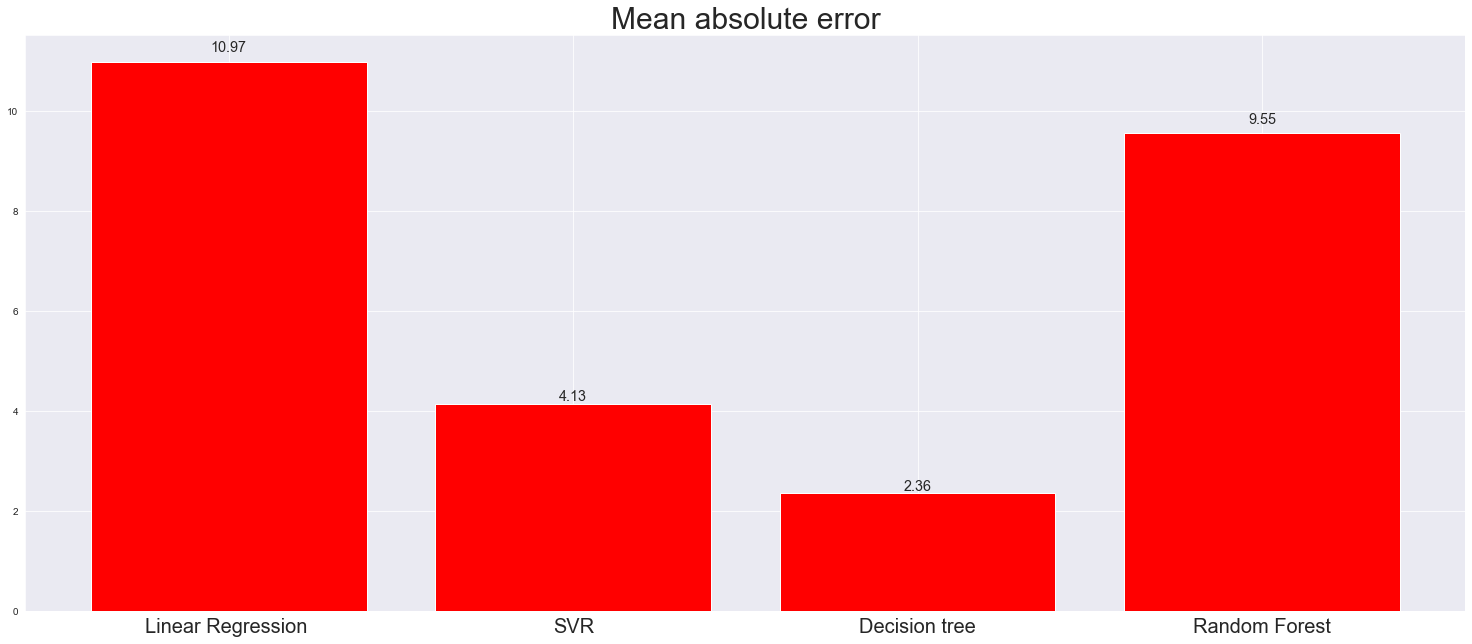

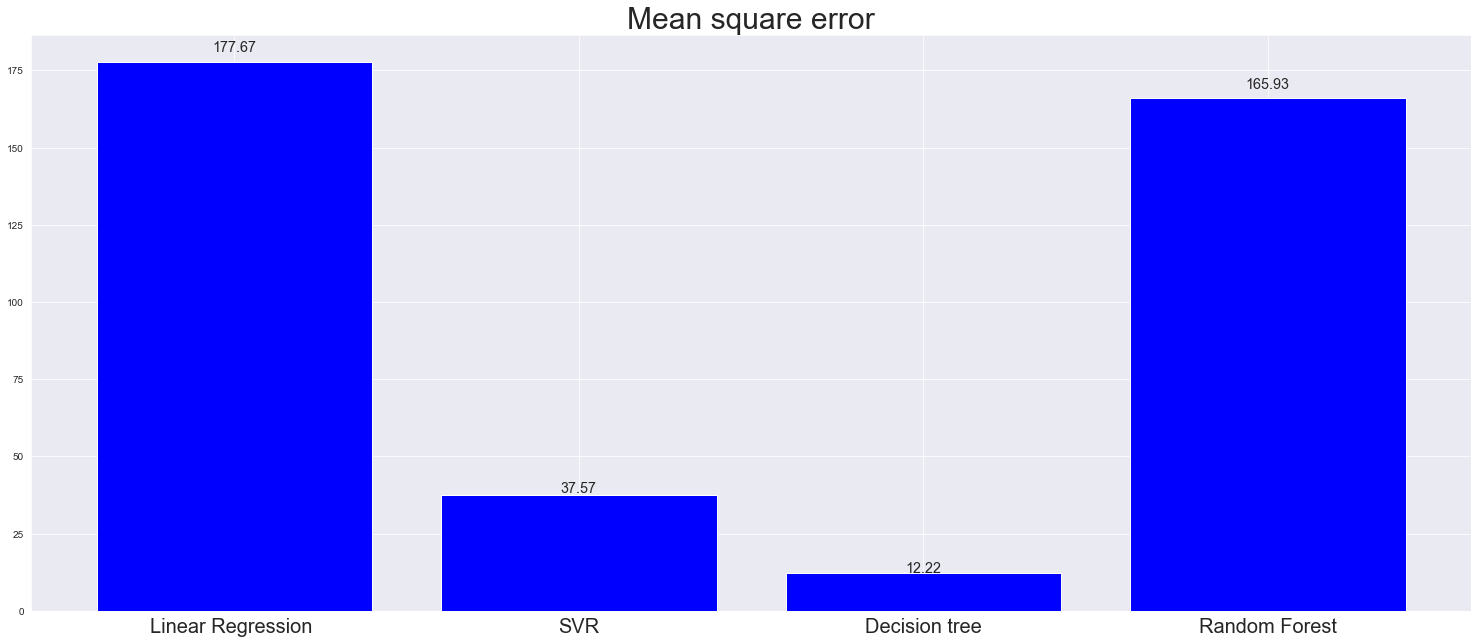

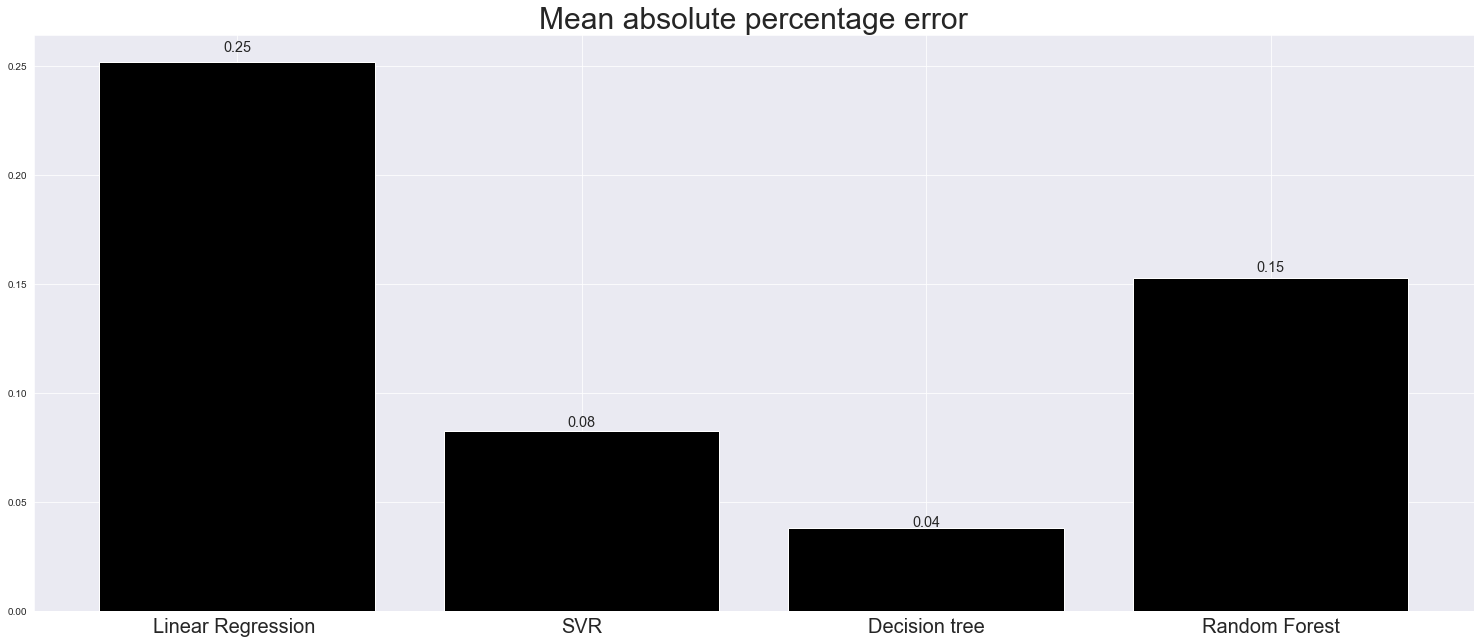

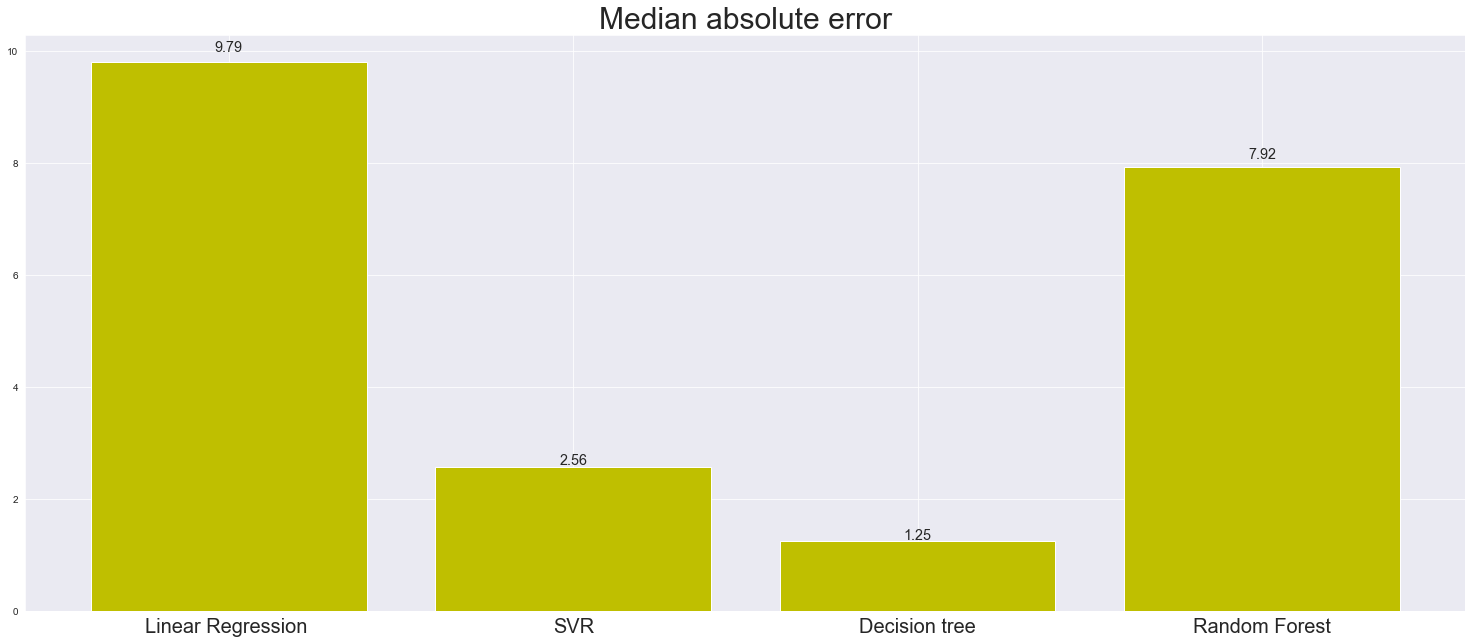

In [33]:
score_names = ["Mean absolute error","Mean square error","Mean absolute percentage error","Median absolute error"]

models_names = [
    'Linear Regression ',
    'SVR',
    'Decision tree',
    'Random Forest']
color = ["r",'b','k','y']

for i in range(len(models_score)):
    data = []
    for j in range(len(models_score[0])):
        data.append(models_score[j][i])
    
    fig = plt.figure()

    ax = fig.add_axes([0,0,1,1])
    ax.bar(models_names,data,color=color[i])
    plt.title(score_names[i], fontsize = 30)
    plt.xticks(fontsize = 20, horizontalalignment = 'center')
    for i in ax.patches:
            width, height = i.get_width(), i.get_height()
            x, y = i.get_xy() 
            ax.annotate(f'{round(height,2)}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large') 

print(data)

